# I. Lý thuyết

1) Transfer Learning thường được thực hiện trên hai dữ liệu nguồn (huấn luyện mô hình nguồn) và dữ liệu đích (huấn luyện mô hình đích) thế nào ?


A. Dữ liệu nguồn và dữ liệu đích có sự liên quan tới nhau. Những đặc trưng trong dữ liệu đích xuất hiện ở những dữ liệu nguồn.

B. Dữ liệu nguồn có số lượng classes lớn hơn dữ liệu đích.

C. Kích thước của dữ liệu nguồn rất nhỏ.

D. Dữ liệu đích ít liên quan tới dữ liệu nguồn.


2) Khi nào thì chúng ta nên thực hiện fine tuning trên toàn bộ các layers của mô hình đích ?

A. Khi hai dữ liệu nguồn và đích có mức độ tương đồng cao và dữ liệu đích có kích thước lớn.

B. Khi hai dữ liệu nguồn và đích có mức độ tương đồng cao và dữ liệu đích có kích thước nhỏ.

C. Dữ liệu đích có kích thước nhỏ và dữ liệu mục tiêu có kích thước lớn.

D. Cả hai dữ liệu đích và mục tiêu đều có kích thước nhỏ.


3) Các phương pháp augmentation nào sẽ kết hợp nội dung từ hai ảnh lẫn nhau và tạo ra một nhãn mềm (_soft label_) cho ảnh?

A. Rotation, Random Crop, MixUp

B. Bright Constrast, Color Shift, Addition Noise

C. CutMix, MixUp

D. Flip, Information Loss 


4) Quá trình xây dựng một mô hình AI trong dự án là một chu trình Machine Learning Cycle kế hợp giữa huấn luyện và gán nhãn dữ liệu. Để tiết kiệm chi phí gán nhãn chúng ta nên sử dụng phương pháp nào ?

A. Lấy mẫu ngẫu nhiên từ tập unlabeled dataset để thực hiện gán nhãn.

B. Sử dụng Active Learning để lựa chọn mẫu mang lại thông tin giúp cải thiện nhiều nhất cho hiệu suất mô hình.

C. Lựa chọn mô hình pretrained lớn nhất có thể.

D. Chỉ lựa các dữ liệu có thông tin rõ ràng, có thể phân biệt được bởi con người.

5) Mô hình lớn thường đạt độ chính xác cao nhưng không deploy được trên các thiết bị edge device, IoT,... Trong khi mô hình nhỏ có thể deploy được nhưng thường có độ chính xác thấp. Phương pháp nào có thể giúp mô hình nhỏ cải thiện được độ chính xác ? Có thể lựa chọn nhiều đáp án.

A. Sử dụng active learning để lựa chọn các mẫu đại diện cho tổng thể để huấn luyện mô hình nhỏ.

B. Áp dụng augmentation để huấn luyện mô hình nhỏ.

C. Fine tuning các layers của mô hình lớn sang mô hình nhỏ.

D. Sử dụng knowledge distillation để chuyển giao tri thức từ mô hình lớn sang mô hình nhỏ.

1A - 2A - 3C - 4B - 5(B,C,D)

# II. Thực hành

6) Từ bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data), hãy huấn luyện một mô hình large (chẳng hạn ResNet50) bằng cách fine-tuning lại các trọng số từ pretrained model của bộ dữ liệu ImageNet. Huấn luyện trên 5 epochs.

7) Hãy huấn luyện một mô hình small (chẳng hạn MobileNetV3) không sử dụng pretrained model trên 1 epochs.

8) Sử dụng mô hình large làm teacher để cải thiện mô hình small là student theo phương pháp knowledge distillation.

9) Áp dụng thêm các kĩ thuật data augmentation kết hợp ảnh khác nhãn để tạo thành nhãn mềm và huấn luyện cải thiện tiếp model student.

10) Giả định cần huấn luyện tiếp mô hình student với các dữ liệu mới chưa được gán nhãn. Hãy xây dựng một kĩ thuật lựa chọn mẫu dựa trên đánh giá uncertainty.

# Câu 6

In [ ]:
from google.colab import drive
import os
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
!ls ../kaggle_dataset/

test  test.zip	train  train.zip  Untitled0.ipynb


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import glob
from sklearn.model_selection import train_test_split

In [ ]:
TRAIN_DIR = '/content/gdrive/MyDrive/kaggle_dataset/train/train'
TEST_DIR = '/content/gdrive/MyDrive/kaggle_dataset/test/test'

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_images = glob.glob(TRAIN_DIR+"/**/**.jpg")
test_images = glob.glob(TEST_DIR+"/**.jpg")

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

Found 25000 files belonging to 2 classes.


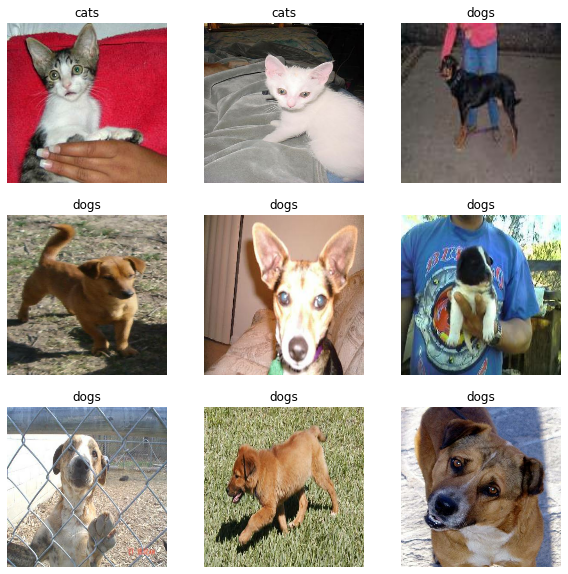

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(TRAIN_DIR,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
train_dataset = train_datagen.flow_from_directory(TRAIN_DIR,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  target_size=IMG_SIZE,
                                                  subset='training')
val_dataset = train_datagen.flow_from_directory(TRAIN_DIR,
                                                shuffle=True,
                                                batch_size=BATCH_SIZE,
                                                target_size=IMG_SIZE,
                                                subset='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
test_dataset = train_datagen.flow_from_directory(TEST_DIR,
                                                shuffle=True,
                                                batch_size=BATCH_SIZE,
                                                target_size=IMG_SIZE
                                                )

Found 0 images belonging to 0 classes.


In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 2048)


In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  175


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

preprocess_input = tf.keras.applications.resnet50.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 5

history_fine = model.fit(train_dataset,
                         epochs=fine_tune_epochs,
                         validation_data=val_dataset)

Epoch 1/5
625/625 [==============================] - 2862s 5s/step - loss: 0.7703 - accuracy: 0.5000 - val_loss: 0.7115 - val_accuracy: 0.5000
Epoch 2/5
625/625 [==============================] - 289s 462ms/step - loss: 0.7176 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/5
625/625 [==============================] - 288s 460ms/step - loss: 0.7107 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/5
625/625 [==============================] - 288s 461ms/step - loss: 0.7094 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/5
625/625 [==============================] - 292s 468ms/step - loss: 0.7078 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000


# Câu 7

In [ ]:
model = tf.keras.applications.MobileNetV3Small(
    	input_shape=(160, 160, 3), alpha=1.0, minimalistic=False, 
    	include_top=True, weights=None, input_tensor=None, classes=2,
    	pooling=None, classifier_activation="softmax",
    	include_preprocessing=True)

# Compile model
model.compile(
      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
      optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
      metrics=['accuracy'])

epoch = 1
history = model.fit(train_dataset,
                    epochs=epoch,
                    validation_data=val_dataset)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


625/625 [==============================] - 344s 473ms/step - loss: 0.6724 - accuracy: 0.5834 - val_loss: 0.6932 - val_accuracy: 0.5000


# Câu 8

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np

In [ ]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results


In [ ]:
model_teacher = tf.keras.applications.MobileNetV3Large(
    input_shape=(160, 160, 3), alpha=1.0, minimalistic=False, include_top=True,
    weights=None , input_tensor=None, classes=2, pooling=None,
    dropout_rate=0.2, classifier_activation='softmax',
    include_preprocessing=True
)

# Compile model
model_teacher.compile(
      loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
      optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
      metrics=['accuracy'])

# Training
epoch = 1
history = model_teacher.fit(train_dataset,
                            epochs=epoch,
                            validation_data=val_dataset)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


625/625 [==============================] - 315s 492ms/step - loss: 0.6647 - accuracy: 0.5935 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
distiller = Distiller(student=model, teacher=model_teacher)
distiller.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
    metrics=['accuracy'],
    student_loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    distillation_loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    alpha=0.1,
    temperature=10,
)

In [ ]:
# Training
epoch = 1
history = distiller.fit(train_dataset,
                        epochs=epoch,
                        validation_data=val_dataset)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


625/625 [==============================] - 301s 468ms/step - accuracy: 0.6236 - student_loss: 0.6439 - distillation_loss: 0.7241 - val_accuracy: 0.5000 - val_student_loss: 0.6957


# Câu 9

In [ ]:
import numpy as np

class MixupImageDataGenerator():
    def __init__(self, generator, directory, batch_size, img_height, img_width, alpha=0.2, subset=None):
        self.batch_index = 0
        self.batch_size = batch_size
        self.alpha = alpha

        # First iterator yielding tuples of (x, y)
        self.generator1 = generator.flow_from_directory(directory,
                                                        target_size=(
                                                            img_height, img_width),
                                                        class_mode="categorical",
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        subset=subset)

        # Second iterator yielding tuples of (x, y)
        self.generator2 = generator.flow_from_directory(directory,
                                                        target_size=(
                                                            img_height, img_width),
                                                        class_mode="categorical",
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        subset=subset)

        # Number of images across all classes in image directory.
        self.n = self.generator1.samples

    def reset_index(self):
        self.generator1._set_index_array()
        self.generator2._set_index_array()

    def on_epoch_end(self):
        self.reset_index()

    def reset(self):
        self.batch_index = 0

    def __len__(self):
        # round up
        return (self.n + self.batch_size - 1) // self.batch_size

    def get_steps_per_epoch(self):
        return self.n // self.batch_size

    def __next__(self):
        if self.batch_index == 0:
            self.reset_index()

        current_index = (self.batch_index * self.batch_size) % self.n
        if self.n > current_index + self.batch_size:
            self.batch_index += 1
        else:
            self.batch_index = 0

        # random sample the lambda value from beta distribution.
        l = np.random.beta(self.alpha, self.alpha, self.batch_size)

        X_l = l.reshape(self.batch_size, 1, 1, 1)
        y_l = l.reshape(self.batch_size, 1)

        # Get a pair of inputs and outputs from two iterators.
        X1, y1 = self.generator1.next()
        X2, y2 = self.generator2.next()

        # Perform the mixup.
        X = X1 * X_l + X2 * (1 - X_l)
        y = y1 * y_l + y2 * (1 - y_l)
        return X, y

    def __iter__(self):
        while True:
            yield next(self)

In [ ]:
batch_size = 32
validation_split = 0.2
img_height = 160
img_width = 160
epochs = 5

# Optional additional image augmentation with ImageDataGenerator.
input_imgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0,
    shear_range=0.05,
    zoom_range=0,
    brightness_range=(1, 1.3),
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=validation_split)

# Create training and validation generator.
train_generator = MixupImageDataGenerator(generator=input_imgen,
                                          directory=TRAIN_DIR,
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_height,
                                          subset='training')
validation_generator = input_imgen.flow_from_directory(TRAIN_DIR,
                                                       target_size=(
                                                           img_height, img_width),
                                                       class_mode="categorical",
                                                       batch_size=batch_size,
                                                       shuffle=True,
                                                       subset='validation')

print('training steps: ', train_generator.get_steps_per_epoch())
print('validation steps: ', validation_generator.samples // batch_size)

distiller.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
    metrics=['accuracy'],
    student_loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    distillation_loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    alpha=0.1,
    temperature=10,
)

history = distiller.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.get_steps_per_epoch(),
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs)

Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
training steps:  625
validation steps:  156


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


625/625 [==============================] - 2313s 4s/step - accuracy: 0.5946 - student_loss: 0.6694 - distillation_loss: 0.7241 - val_accuracy: 0.5000 - val_student_loss: 0.6970
Epoch 2/5
625/625 [==============================] - 595s 953ms/step - accuracy: 0.6402 - student_loss: 0.6396 - distillation_loss: 0.7241 - val_accuracy: 0.4996 - val_student_loss: 0.6916
Epoch 3/5
 25/625 [>.............................] - ETA: 9:17 - accuracy: 0.6500 - student_loss: 0.6319 - distillation_loss: 0.7241

# Câu 10

In [ ]:
net = model
def predict_prob(data):
  probs = net.predict_prob(data)
  return probs

def MarginSampling(n):
  unlabeled_idxs, unlabeled_data = test_dataset.get_unlabeled_data()
  probs = predict_prob(unlabeled_data)
  probs_sorted, idxs = probs.sort(descending=True)
  uncertainties = probs_sorted[:, 0] - probs_sorted[:,1]
  return unlabeled_idxs[uncertainties.sort()[1][:n]]